In [1]:
import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt

import tools as cpg

In [2]:
upstreamFDRflesri = './data/NHDPlusV21_CO_14_14a_FdrFac_01/NHDPlusCO/NHDPlus14/NHDPlusFdrFac14a/fdr/hdr.adf'
downstreamFDRflesri = './data/NHDPlusV21_CO_15_15b_FdrFac_01/NHDPlusCO/NHDPlus15/NHDPlusFdrFac15b/fdr/hdr.adf'

upstreamFACfltau = './data/14a_fac.tif'
upstreamFDRfltau = './data/14a_fdr.tif'
downstreamFACfltau = './data/15b_fac.tif'
downstreamFDRfltau = './data/15b_fdr.tif'

In [3]:
cpg.tauDrainDir(upstreamFDRflesri, upstreamFDRfltau)
cpg.tauDrainDir(downstreamFDRflesri, downstreamFDRfltau)

Reclassifying Flow Directions...
TauDEM drainage direction written to: ./data/14a_fdr.tif
Reclassifying Flow Directions...
TauDEM drainage direction written to: ./data/15b_fdr.tif


In [4]:
cpg.tauFlowAccum(upstreamFDRfltau, upstreamFACfltau)

Accumulating Data...
mpiexec -bind-to rr -n 1 aread8 -p ./data/14a_fdr.tif -ad8 ./data/14a_fac.tif -nc


In [8]:
# do some work to create the update dictionary
x,y,d,w = cpg.findLastFACFD(upstreamFACfltau, upstreamFACfltau)
#facMax = cpg.queryPoint(x,y,upstreamFACfltau)
#dx,dy = cpg.FindDownstreamCellTauDir(d,x,y,w)
cpg.createUpdateDict(x,y,d,'14','./data/huc14.json')

Update dictionary found: ./data/huc14.json
Updating dictionary...


{'14': {'x': ['-1371809.9999999995'],
  'y': ['1647749.9999999963'],
  'maxUpstreamFAC': ['183857900.0'],
  'vars': ['maxUpstreamFAC']}}

In [12]:
cpg.makeFACweight(downstreamFDRfltau,'./data/downstream_test_FACweight.tif')

In [ ]:
cpg.adjustFAC(downstreamFDRfltau, './data/downstream_test_FACweight.tif',
              './data/huc14.json',downstreamFDRfltau,'./data/ds_adjFAC.tif',8)

Updating FAC weighting grid with value from 14 FAC
Accumulating Data...
mpiexec -bind-to rr -n 8 aread8 -p ./data/15b_fdr.tif -ad8 ./data/ds_adjFAC.tif -wg ./data/downstream_test_FACweight.tif -nc


In [55]:
w

30.0

In [40]:
newx, newy = upFACsrc.xy(row,col)

In [25]:
downFACsrc = rs.open(downstreamFACfl)
dwnFAC = downFACsrc.read(1)

In [41]:
ccx,ccy = downFACsrc.index(newx,newy)

In [47]:
newx

[-1048829.9999999995]

In [45]:
ccy

[27997]

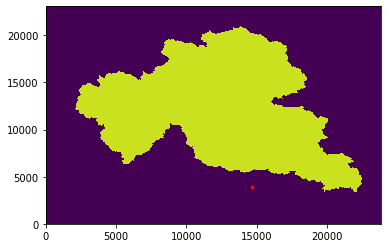

In [50]:
plt.pcolormesh(upFAC)
plt.plot(col,row,'r.')

In [9]:
upFAC.read(1).max()

183886826

In [6]:
upFAC.max()

183886826